# Marque les esprits avec des graphiques Matplotlib spectaculaires !

## Importations

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mtick

## Données fictives

In [2]:
df = pd.DataFrame([['Vêtements', 0.1],
                   ['Décoration intérieure', 0.43],
                   ['Électronique', 0.13],
                   ['Articles de papeterie', 0.2],
                   ['Jouets', 0.14]], columns = ['Catégorie de dépenses', 'Marge bénéficiaire'])

In [3]:
df

,Catégorie de dépenses,Marge bénéficiaire
0,Vêtements,0.10
1,Décoration intérieure,0.43
2,Électronique,0.13
3,Articles de papeterie,0.20
4,Jouets,0.14


## Graphique de base de Matplotlib

In [4]:
def percent_formatter(x, pos):
    return f"{x*100:.0f}%"

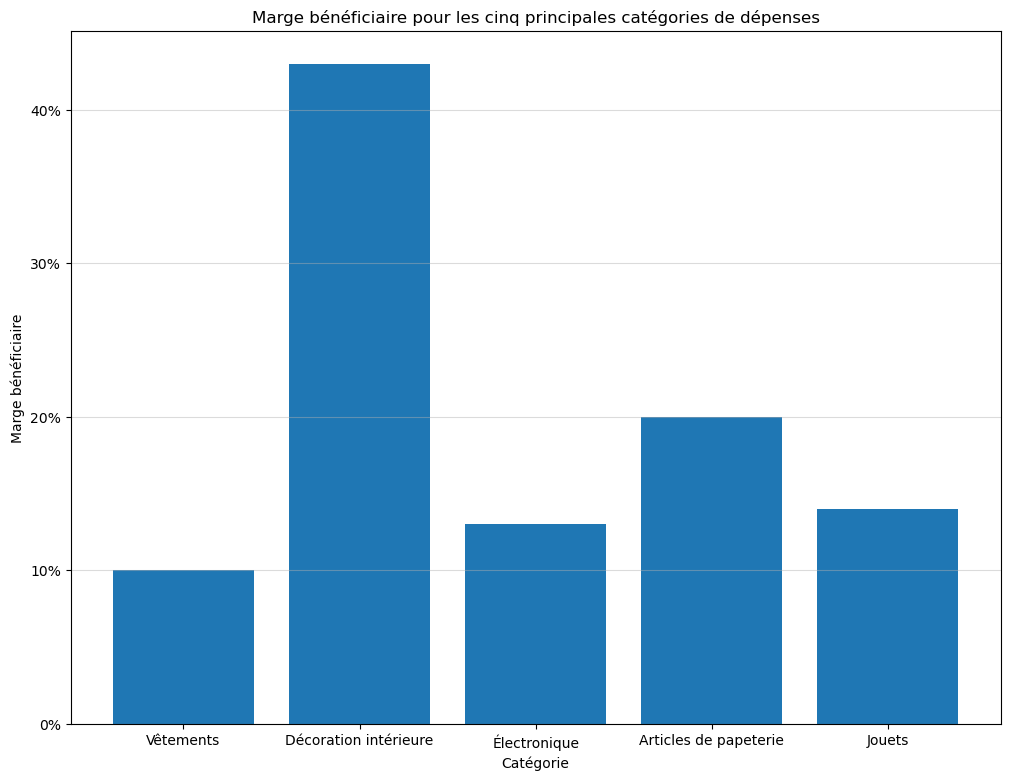

In [5]:
# Définir la figure
fig,ax = plt.subplots(figsize = (12,9))

# Créer un diagramme à barres
plt.bar(df['Catégorie de dépenses'], df['Marge bénéficiaire'])

# Convertir les étiquettes de l'axe des y en pourcentage
ax.yaxis.set_major_formatter(mtick.FuncFormatter(percent_formatter))

# afficher la grille
plt.grid(axis = 'y',alpha = 0.45)

# Définir le titre et l'étiquette x-y 
plt.title('Marge bénéficiaire pour les cinq principales catégories de dépenses')
plt.ylabel('Marge bénéficiaire')
plt.xlabel('Catégorie')

plt.show()

## Matplotlib + un peu d'effort supplémentaire

In [6]:
## trier le dataframe
df = df.sort_values("Marge bénéficiaire", ascending=True, ignore_index = True)
df

,Catégorie de dépenses,Marge bénéficiaire
0,Vêtements,0.10
1,Électronique,0.13
2,Jouets,0.14
3,Articles de papeterie,0.20
4,Décoration intérieure,0.43


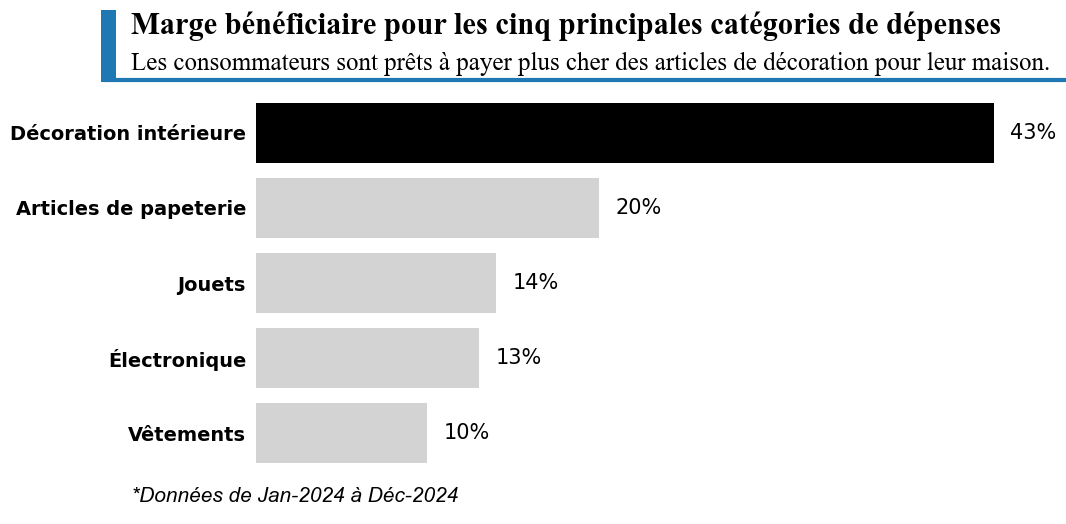

In [7]:
# Définir la figure
fig,ax = plt.subplots(figsize = (10,6))

# ajouter un titre au graphique
title = 'Marge bénéficiaire pour les cinq principales catégories de dépenses'
plt.text(s=title,                      # le texte à afficher
         x = 0,y = 0.91,               # la position du texte (x, y)
         fontname = 'Times New Roman', # la police à utiliser pour le texte
         fontweight = "bold",          # l'importance de la police (par exemple, gras)
         fontsize = 22,                # la taille de la police
         ha='left',                    # l'alignement horizontal du texte ('left', 'center', 'right')
         transform = fig.transFigure   # le système de coordonnées à utiliser pour positionner le texte
)

# ajouter un sous-titre au graphique
subtitle = 'Les consommateurs sont prêts à payer plus cher des articles de décoration pour leur maison.'
plt.text(s=subtitle,                   # le texte à afficher
         x = 0, y = 0.85,              # la position du texte (x, y)
         fontname = 'Times New Roman', # la police à utiliser pour le texte
         fontsize = 18,                # la taille de la police
         ha = 'left',                  # l'alignement horizontal du texte ('left', 'center', 'right')
         transform = fig.transFigure   # le système de coordonnées à utiliser pour positionner le texte
)

# Créer un diagramme à barres
bars = plt.barh(df['Catégorie de dépenses'], 
                df['Marge bénéficiaire'], 
                color = ['lightgray', 'lightgray', 'lightgray', 'lightgray', "black"], # couleur pour les barres
                edgecolor='none')

# ajouter une marge
plt.margins(y=0.14)

# supprimer les bordures du graphique
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)


# supprimer les xlabels
ax.set_xticklabels([])
ax.set_xticks([])

# positionner et formater les ylabels
ax.tick_params(axis='y', left=False)
plt.yticks(fontsize=14, fontweight='bold')

plt.bar_label(
    bars,                                          # l'objet bars auquel ajouter des étiquettes
    labels=[f'{x:.0%}' for x in bars.datavalues],  # la liste des étiquettes (labels) à afficher sur chaque barre
    padding=12,                                    # remplissage entre la barre et l'étiquette
    fontsize=15                                    # la taille de la police des étiquettes
)

# ajouter une ligne
ax.plot(
    [-0.025, .94],                # Coordonnées X des extrémités de la ligne
    [.8335, .8335],               # Coordonnées Y des extrémités de la ligne
    transform = fig.transFigure,  # Système de coordonnées pour la ligne
    clip_on = False,              # Indique s'il faut attacher la ligne aux limites de l'axe.
    color = 'tab:blue',           # Couleur de la ligne
    linewidth = 3                 # Largeur de la ligne
)


# ajouter un rectangle
ax.add_patch(
    plt.Rectangle(
        (-0.03,.95),                   # (x, y) emplacement du coin inférieur gauche du rectangle
        0.015,                         # largeur du rectangle
        -0.12,                         # hauteur du rectangle
        facecolor = 'tab:blue',        # couleur de remplissage du rectangle
        transform = fig.transFigure,   # système de coordonnées utilisé pour le rectangle
        clip_on = False,               # si le rectangle est dessiné en dehors de la zone de tracé
        linewidth = 0                  # largeur de la ligne de bord du rectangle
    )
)  

# ajouter une note de bas de page
footnote = "*Données de Jan-2024 à Déc-2024"
plt.text(s = footnote,
         x = 0,
         y = 0.13,
         fontname = 'Arial',
         fontstyle = 'italic',
         fontsize = 15,
         ha = 'left',
         transform = fig.transFigure
);